In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!pip install pykeen torch pandas matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 730.3/730.3 kB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.9/413.9 kB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 6.4 MB/s eta 0:00:00


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

from pykeen.triples import TriplesFactory
from pykeen.pipeline import pipeline


INFO:pykeen.utils:Using opt_einsum


In [4]:
train_path = "/content/drive/MyDrive/graphs-precog/train.txt"
test_path  = "/content/drive/MyDrive/graphs-precog/test.txt"

train = pd.read_csv(train_path, sep=" ", header=None, names=["h","r","t"])
test  = pd.read_csv(test_path,  sep=" ", header=None, names=["h","r","t"])

print("Train triples:", len(train))
print("Test triples:", len(test))

train.head()


Train triples: 13821
Test triples: 590


,h,r,t
0,olivia0,sisterOf,selina10
1,olivia0,sisterOf,isabella11
2,olivia0,sisterOf,oskar24
3,olivia0,sisterOf,adam9
4,olivia0,secondAuntOf,lena18


In [5]:
entities = set(train.h) | set(train.t)
relations = set(train.r)

print("Unique entities:", len(entities))
print("Unique relations:", len(relations))



Unique entities: 1316
Unique relations: 28


In [6]:
tf_train = TriplesFactory.from_labeled_triples(train.values)

tf_test = TriplesFactory.from_labeled_triples(
    test.values,
    entity_to_id=tf_train.entity_to_id,
    relation_to_id=tf_train.relation_to_id
)


In [7]:
config = dict(
    embedding_dim = 512,
    epochs = 200,
    batch_size = 256,
    lr = 5e-4,
    margin = 3,
    neg_per_pos = 15,
    seed = 67,
)


In [8]:
result = pipeline(
    model="TransE",
    training=tf_train,
    testing=tf_test,

    # model hyperparameters
    model_kwargs=dict(
        embedding_dim=config["embedding_dim"],
    ),

    # loss = hinge / margin ranking
    loss="marginranking",
    loss_kwargs=dict(
        margin=config["margin"]
    ),

    # negative sampling control
    negative_sampler="basic",
    negative_sampler_kwargs=dict(
        num_negs_per_pos=config["neg_per_pos"]
    ),

    # optimizer
    optimizer_kwargs=dict(
        lr=config["lr"]
    ),

    training_kwargs=dict(
        num_epochs=config["epochs"],
        batch_size=config["batch_size"],
    ),

    random_seed=config["seed"],
)


INFO:pykeen.pipeline.api:Using device: None
INFO:pykeen.nn.representation:Inferred unique=False for Embedding()
INFO:pykeen.nn.representation:Inferred unique=False for Embedding()


Training epochs on cuda:0:   0%|          | 0/200 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0.00/54.0 [00:00<?, ?batch/s]

Evaluating on cuda:0:   0%|          | 0.00/590 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.27s seconds


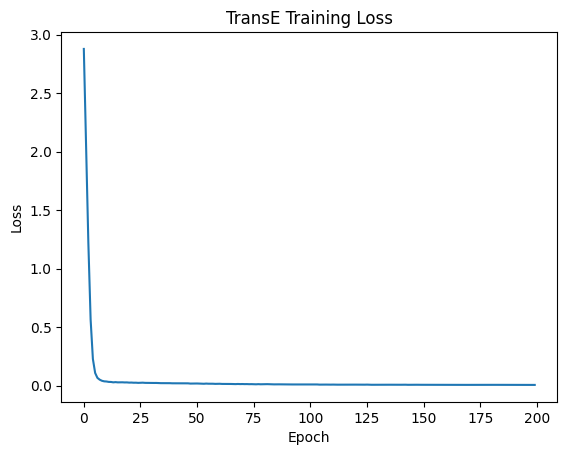

In [9]:
plt.plot(result.losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("TransE Training Loss")
plt.show()


In [10]:
metrics = result.metric_results.to_dict()

print("MRR:", metrics["both"]["realistic"]["inverse_harmonic_mean_rank"])
print("Hits@1:", metrics["both"]["realistic"]["hits_at_1"])
print("Hits@3:", metrics["both"]["realistic"]["hits_at_3"])
print("Hits@10:", metrics["both"]["realistic"]["hits_at_10"])


MRR: 0.5136329531669617
Hits@1: 0.21949152542372882
Hits@3: 0.7762711864406779
Hits@10: 0.9720338983050848


In [19]:
from pykeen.predict import predict_target

# CONFIG (adjustable)


TRIPLE_INDEX = 45 # range: 0 → len(test)-1
TOP_K = 10         # range: 1 → num_entities (recommend ≤ 20)


row = test.iloc[TRIPLE_INDEX]
h, r, t_true = row.h, row.r, row.t

print("LINK PREDICTION  — TransE")


print("\nModel input:")
print(f"  head     = {h}")
print(f"  relation = {r}")
print("  tail     = ?  (unknown — model must rank candidates)")

print("\nGround truth tail (held-out answer from test set):")
print(f"  tail_true = {t_true}")

print("\nTask:")
print("  Rank all entities as possible tails for (head, relation, ?)")
print("  TransE score = embedding distance → LOWER = more plausible")


pred = predict_target(
    model=result.model,
    head=h,
    relation=r,
    triples_factory=tf_test,
)

pred_table = (
    pred.df[["tail_label", "score"]]
    .rename(columns={
        "tail_label": "Predicted Tail",
        "score": "Distance"
    })
    .head(TOP_K)
    .copy()
)

pred_table.index = range(1, TOP_K+1)
pred_table.index.name = "Rank"

display(pred_table)



full = pred.df.reset_index(drop=True)
pos = full.index[full["tail_label"] == t_true].tolist()

print("\n")
if pos:
    print(f"True tail '{t_true}' is ranked at position: {pos[0] + 1}")
else:
    print("True tail not found — unexpected")


LINK PREDICTION  — TransE

Model input:
  head     = elias159
  relation = fatherOf
  tail     = ?  (unknown — model must rank candidates)

Ground truth tail (held-out answer from test set):
  tail_true = jan168

Task:
  Rank all entities as possible tails for (head, relation, ?)
  TransE score = embedding distance → LOWER = more plausible


,Predicted Tail,Distance
Rank,,
1,helga183,-23.646618
2,elias159,-25.365398
3,philipp160,-25.460068
4,konstantin163,-25.895432
5,natalie178,-26.598091
6,oliver165,-27.106018
7,isabella166,-27.323294
8,simon172,-28.431316
9,jan168,-28.474176




True tail 'jan168' is ranked at position: 9


In [12]:

import os
import pickle
import torch

SAVE_DIR = "/content/drive/MyDrive/graphs-precog/model_checkpoint"

os.makedirs(SAVE_DIR, exist_ok=True)

model_path = os.path.join(SAVE_DIR, "transe_model.pth")
torch.save(result.model.state_dict(), model_path)

with open(os.path.join(SAVE_DIR, "train_factory.pkl"), "wb") as f:
    pickle.dump(tf_train, f)

with open(os.path.join(SAVE_DIR, "test_factory.pkl"), "wb") as f:
    pickle.dump(tf_test, f)

with open(os.path.join(SAVE_DIR, "config.pkl"), "wb") as f:
    pickle.dump(config, f)

print("Model saved to:", SAVE_DIR)
print("  - transe_model.pth")
print("  - train_factory.pkl")
print("  - test_factory.pkl")
print("  - config.pkl")

Model saved to: /content/drive/MyDrive/graphs-precog/model_checkpoint
  - transe_model.pth
  - train_factory.pkl
  - test_factory.pkl
  - config.pkl


To test it :

In [13]:

import os
import pickle
import torch
from pykeen.models import TransE

SAVE_DIR = "/content/drive/MyDrive/graphs-precog/model_checkpoint"

with open(os.path.join(SAVE_DIR, "train_factory.pkl"), "rb") as f:
    loaded_tf_train = pickle.load(f)

with open(os.path.join(SAVE_DIR, "test_factory.pkl"), "rb") as f:
    loaded_tf_test = pickle.load(f)

with open(os.path.join(SAVE_DIR, "config.pkl"), "rb") as f:
    loaded_config = pickle.load(f)

loaded_model = TransE(
    triples_factory=loaded_tf_train,
    embedding_dim=loaded_config["embedding_dim"],
    random_seed=loaded_config["seed"]
)

model_path = os.path.join(SAVE_DIR, "transe_model.pth")
loaded_model.load_state_dict(torch.load(model_path))
loaded_model.eval()

print("✓ Model loaded successfully!")
print("  Config:", loaded_config)

INFO:pykeen.nn.representation:Inferred unique=False for Embedding()
INFO:pykeen.nn.representation:Inferred unique=False for Embedding()


✓ Model loaded successfully!
  Config: {'embedding_dim': 512, 'epochs': 200, 'batch_size': 256, 'lr': 0.0005, 'margin': 3, 'neg_per_pos': 15, 'seed': 67}


In [14]:

from pykeen.predict import predict_target

test_triples = [
    (train.iloc[0].h, train.iloc[0].r, train.iloc[0].t),
    (train.iloc[5].h, train.iloc[5].r, train.iloc[5].t),
    (train.iloc[10].h, train.iloc[10].r, train.iloc[10].t),
]

for idx, (h, r, t_true) in enumerate(test_triples, 1):
    pred = predict_target(
        model=loaded_model,
        head=h,
        relation=r,
        triples_factory=loaded_tf_train,
    )

    top_3 = pred.df[["tail_label", "score"]].head(3).reset_index(drop=True)
    top_3.index = top_3.index + 1

    pred_ranks = pred.df.reset_index(drop=True)
    pos = pred_ranks.index[pred_ranks["tail_label"] == t_true].tolist()
    true_rank = pos[0] + 1 if pos else "Not in rankings"

    print(f"\n--- Test {idx} ---")
    print(f"({h}) --[{r}]--> (?)")
    print(f"Ground truth: {t_true}, Ranked at: {true_rank}")
    print(top_3)
    print()


--- Test 1 ---
(olivia0) --[sisterOf]--> (?)
Ground truth: selina10, Ranked at: 5
  tail_label      score
1    olivia0 -24.173573
2    oskar24 -25.172728
3      adam9 -26.041637


--- Test 2 ---
(olivia0) --[secondAuntOf]--> (?)
Ground truth: fabian26, Ranked at: 3
  tail_label      score
1     lena18 -25.656530
2      nico4 -27.547808
3   fabian26 -27.550514


--- Test 3 ---
(olivia0) --[daughterOf]--> (?)
Ground truth: dominik2, Ranked at: 1
   tail_label      score
1    dominik2 -23.846428
2     olivia0 -25.236067
3  katharina1 -25.687967

